In [1]:
import os
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Flatten, Dense, Dropout
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image, display

Using TensorFlow backend.


In [2]:
batch_size = 32

classes = ['apple', 'banana', 'cherry', 'grape', 'melon', 'orange', 'strawberry']
nb_classes = len(classes)

img_rows = 100
img_cols = 100
channels = 3

train_data_dir = './data/train'
validation_data_dir = './data/validation'

epochs = 50

result_dir = './results'

In [3]:
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

In [4]:
input_tensor = Input(shape=(img_rows, img_cols, 3))
base_model = VGG19(include_top=False, weights='imagenet', input_tensor=input_tensor)

In [5]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [15]:
x = base_model.output
x = Flatten(input_shape=base_model.output_shape[1:])(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation='softmax')(x)

In [16]:
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [17]:
# base_modelをフリーズ
for layer in base_model.layers:
    layer.trainable = False

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,# シアー変換
    zoom_range=0.2, #  ランダムに　ズーム
    rotation_range=20, # ランダムな回転回転角度
    horizontal_flip=True, # 水平方向に反転
    vertical_flip=True # 垂直方向に反転
)

In [20]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

Found 4565 images belonging to 7 classes.
Found 697 images belonging to 7 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/50
142/142 [==============================] - 2372s - loss: 1.7341 - acc: 0.3677 - val_loss: 1.6799 - val_acc: 0.3958
Epoch 2/50
142/142 [==============================] - 1112s - loss: 1.5335 - acc: 0.4493 - val_loss: 1.5772 - val_acc: 0.4647
Epoch 3/50
142/142 [==============================] - 1133s - loss: 1.4643 - acc: 0.4774 - val_loss: 1.5425 - val_acc: 0.4526
Epoch 4/50
142/142 [==============================] - 1140s - loss: 1.3962 - acc: 0.5047 - val_loss: 1.4122 - val_acc: 0.5143
Epoch 5/50
142/142 [==============================] - 3297s - loss: 1.3591 - acc: 0.5227 - val_loss: 1.4552 - val_acc: 0.4932
Epoch 6/50
142/142 [==============================] - 2122s - loss: 1.3023 - acc: 0.5460 - val_loss: 1.3774 - val_acc: 0.5128
Epoch 7/50
142/142 [==============================] - 1105s - loss: 1.2897 - acc: 0.5560 - val_loss: 1.2650 - val_acc: 0.5504
Epoch 8/50
142/142 [==============================] - 1134s - loss: 1.2644 - acc: 0.5585 - val_loss: 1.3309 - val_acc:

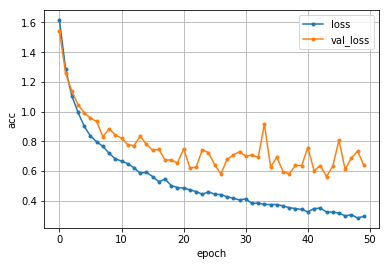

In [17]:
# plot results
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

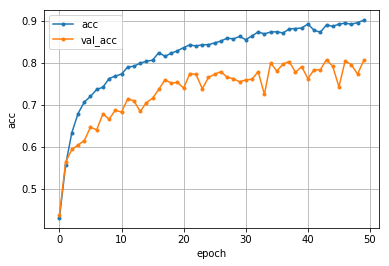

In [31]:
# plot results
loss = history.history['acc']
val_loss = history.history['val_acc']

plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [32]:
import pickle

with open('./results/history-vgg19_1.pkl', mode='wb') as f:
    pickle.dump(history.history, f)

In [20]:
model.save('./results/model-vgg19_1.h5')

In [21]:
def predict(img_file_path):
    
    display(Image(img_file_path, width=150, unconfined=True))
    img = image.load_img(img_file_path, target_size=(img_rows, img_cols))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # 学習時にImageDataGeneratorのrescaleで正規化したので同じ処理が必要！
    # これを忘れると結果がおかしくなるので注意
    x = x / 255.0

    # クラスを予測
    # 入力は1枚の画像なので[0]のみ
    pred = model.predict(x)[0]

    # 予測確率が高いトップ5を出力
    top = 5
    top_indices = pred.argsort()[-top:][::-1]
    result = [(classes[i], pred[i]) for i in top_indices]
    for x in result:
        print(x)

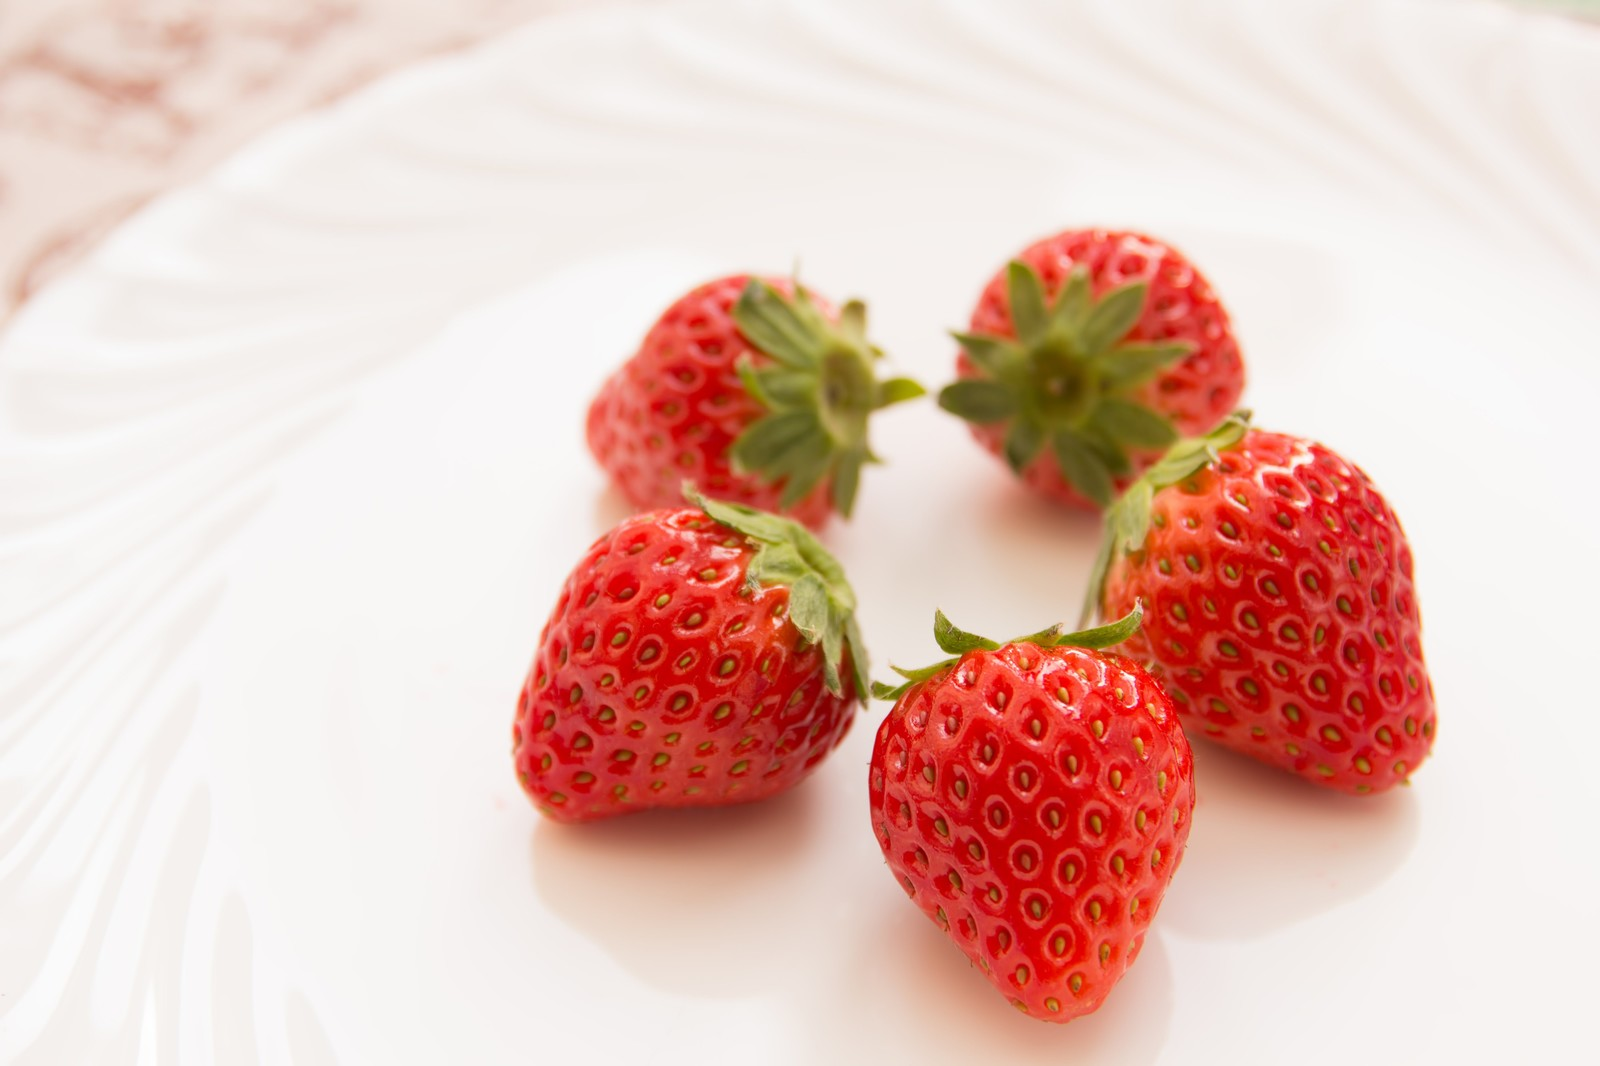

('strawberry', 0.99987793)
('melon', 0.00010504985)
('apple', 1.1394404e-05)
('cherry', 3.7985533e-06)
('grape', 1.2763738e-06)


In [24]:
predict('./data/samples/strawberry1.jpg')

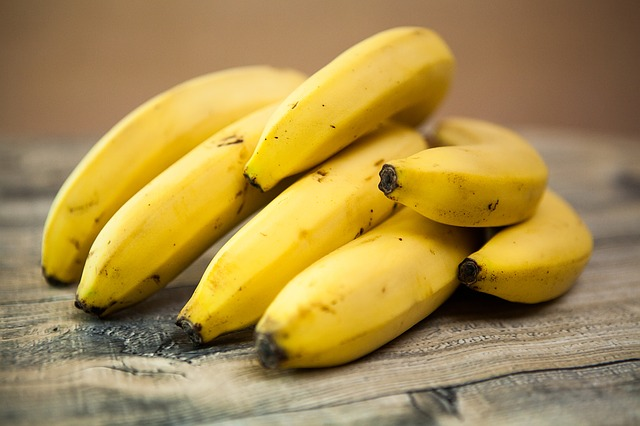

('banana', 0.98385161)
('apple', 0.008377349)
('melon', 0.0073516578)
('orange', 0.00035400435)
('grape', 5.5620701e-05)


In [25]:
predict('./data/samples/banana1.jpg')

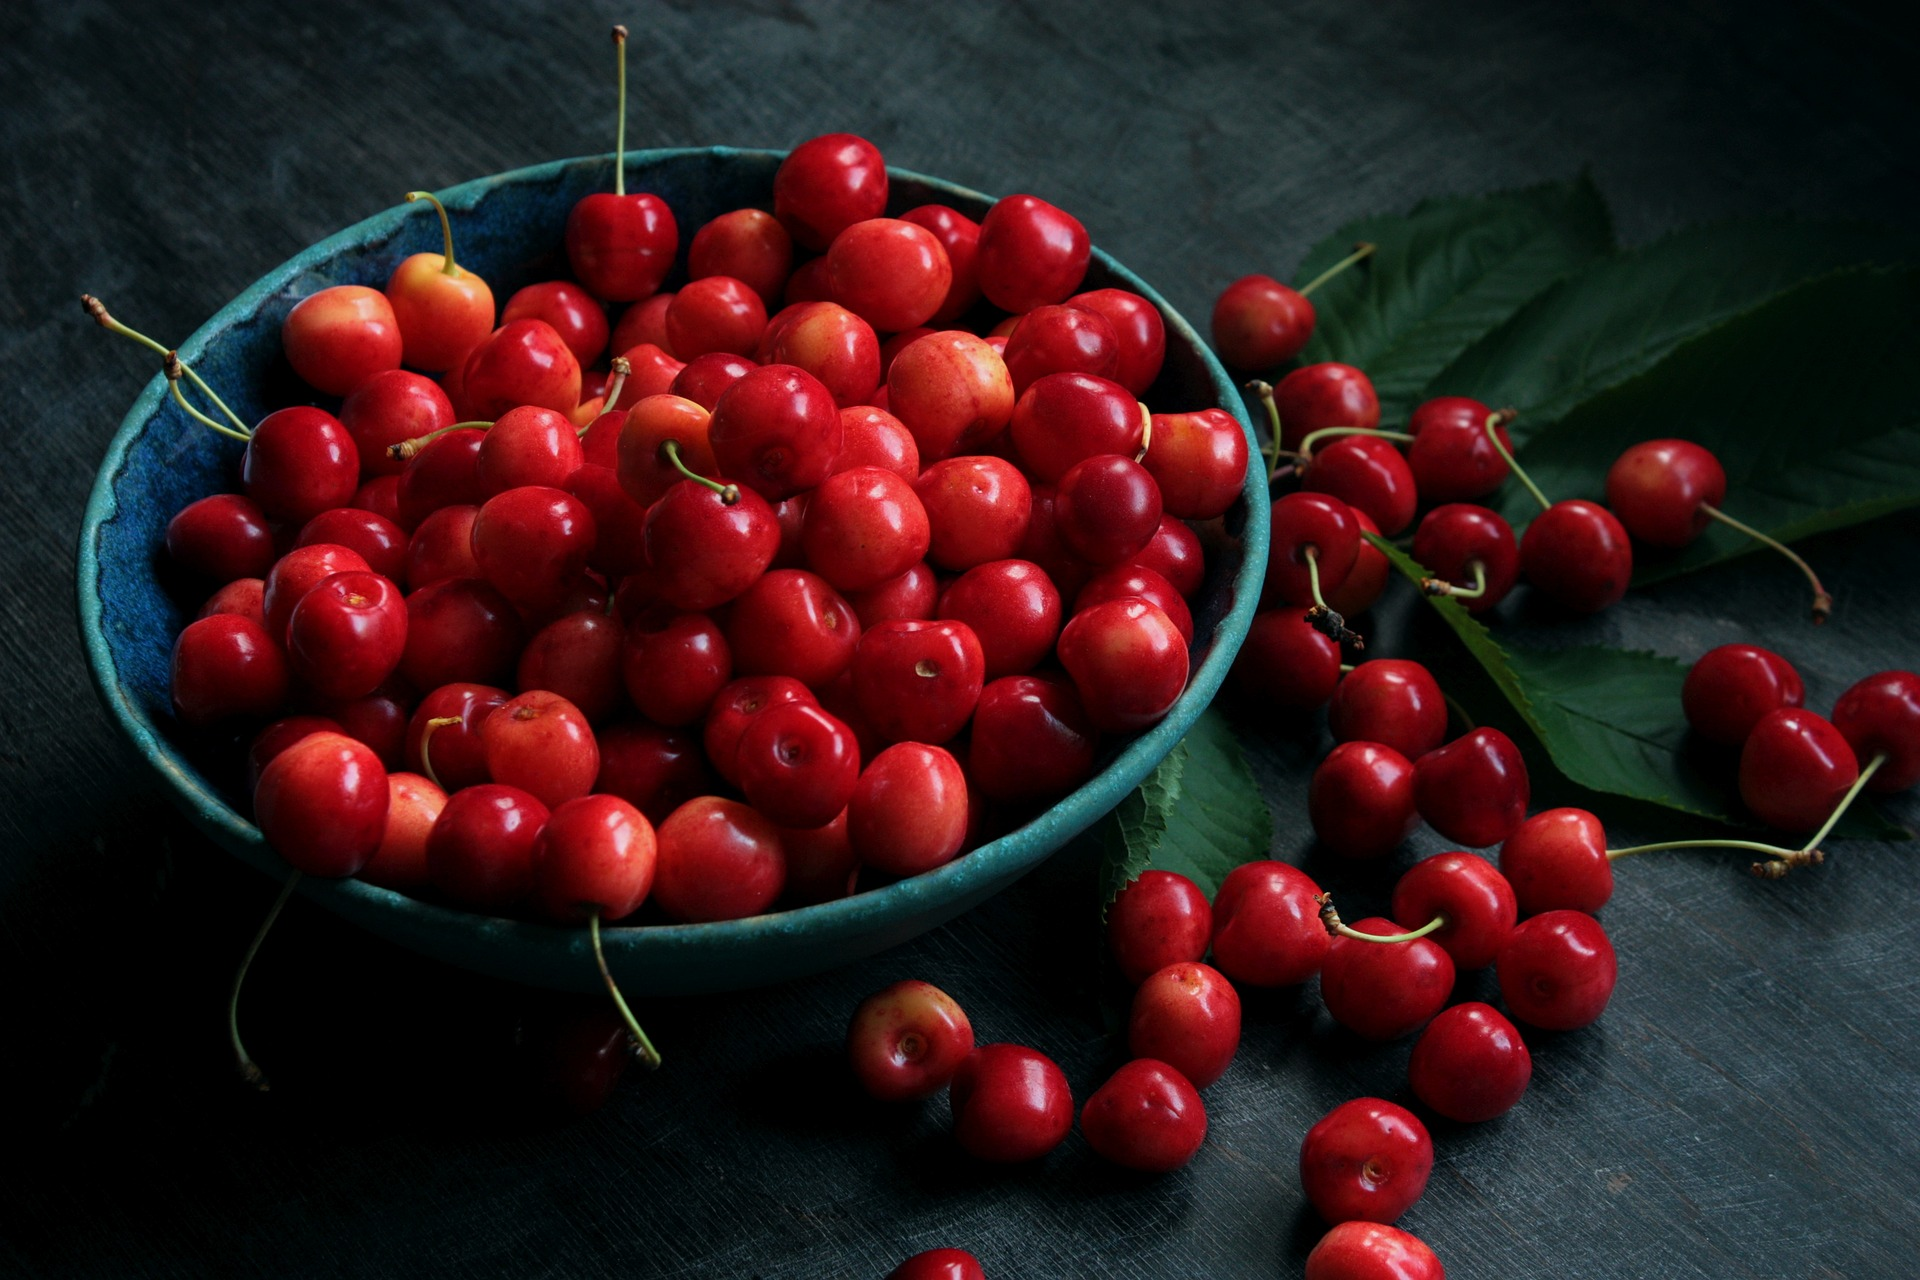

('cherry', 0.82195854)
('strawberry', 0.17497578)
('grape', 0.0015935024)
('melon', 0.00098663475)
('apple', 0.00041538914)


In [26]:
predict('./data/samples/cherry1.jpg')

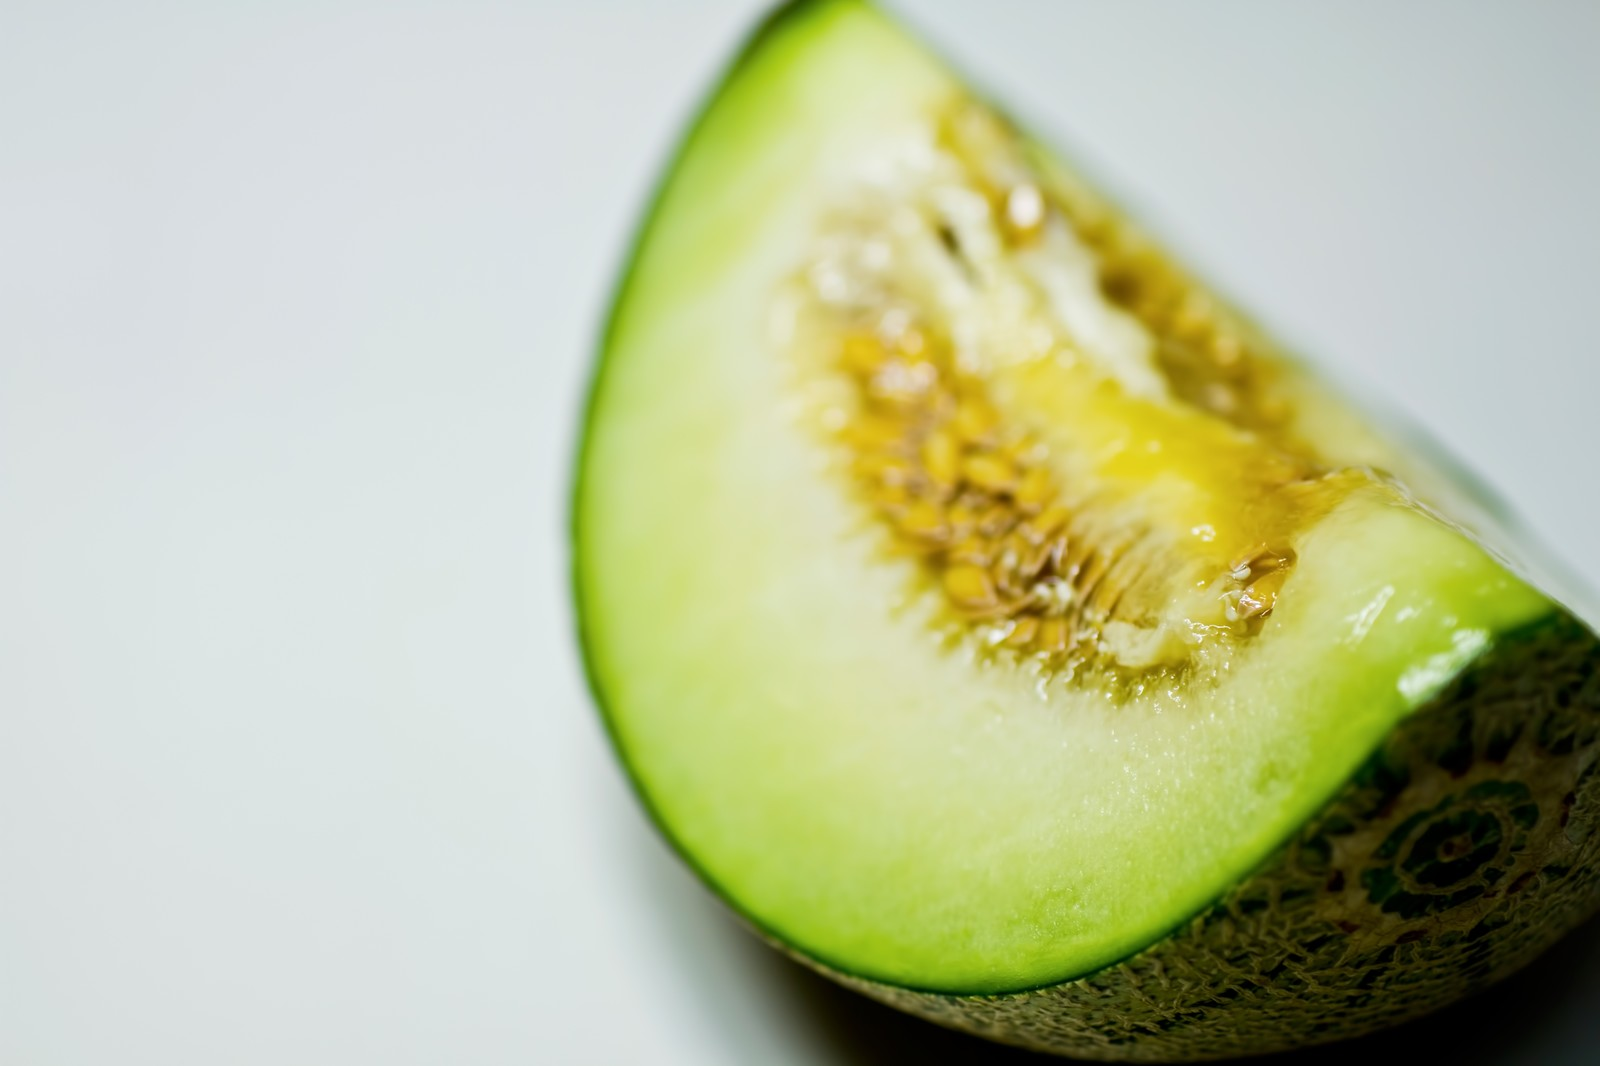

('melon', 0.99261487)
('orange', 0.0023461247)
('apple', 0.0021901294)
('strawberry', 0.002079482)
('banana', 0.00072579464)


In [27]:
predict('./data/samples/melon1.jpg')

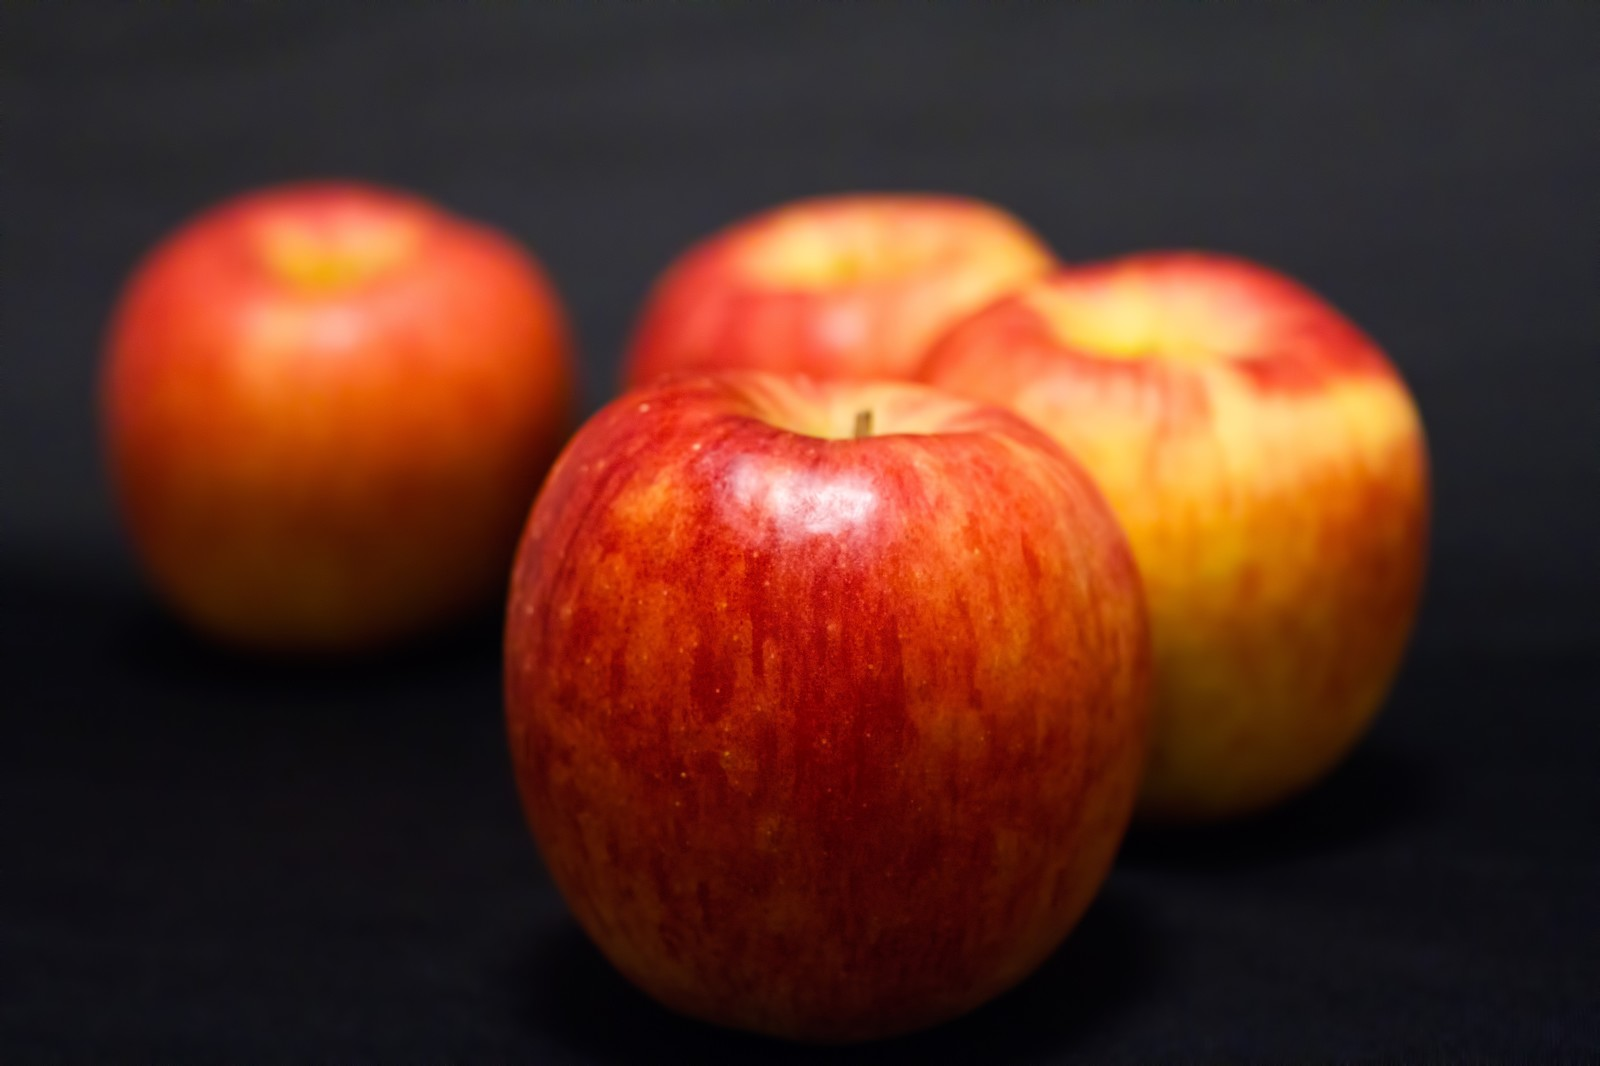

('apple', 0.99977463)
('orange', 0.00015691579)
('melon', 4.4341337e-05)
('cherry', 1.0477691e-05)
('grape', 8.978127e-06)


In [28]:
predict('./data/samples/apple1.jpg')

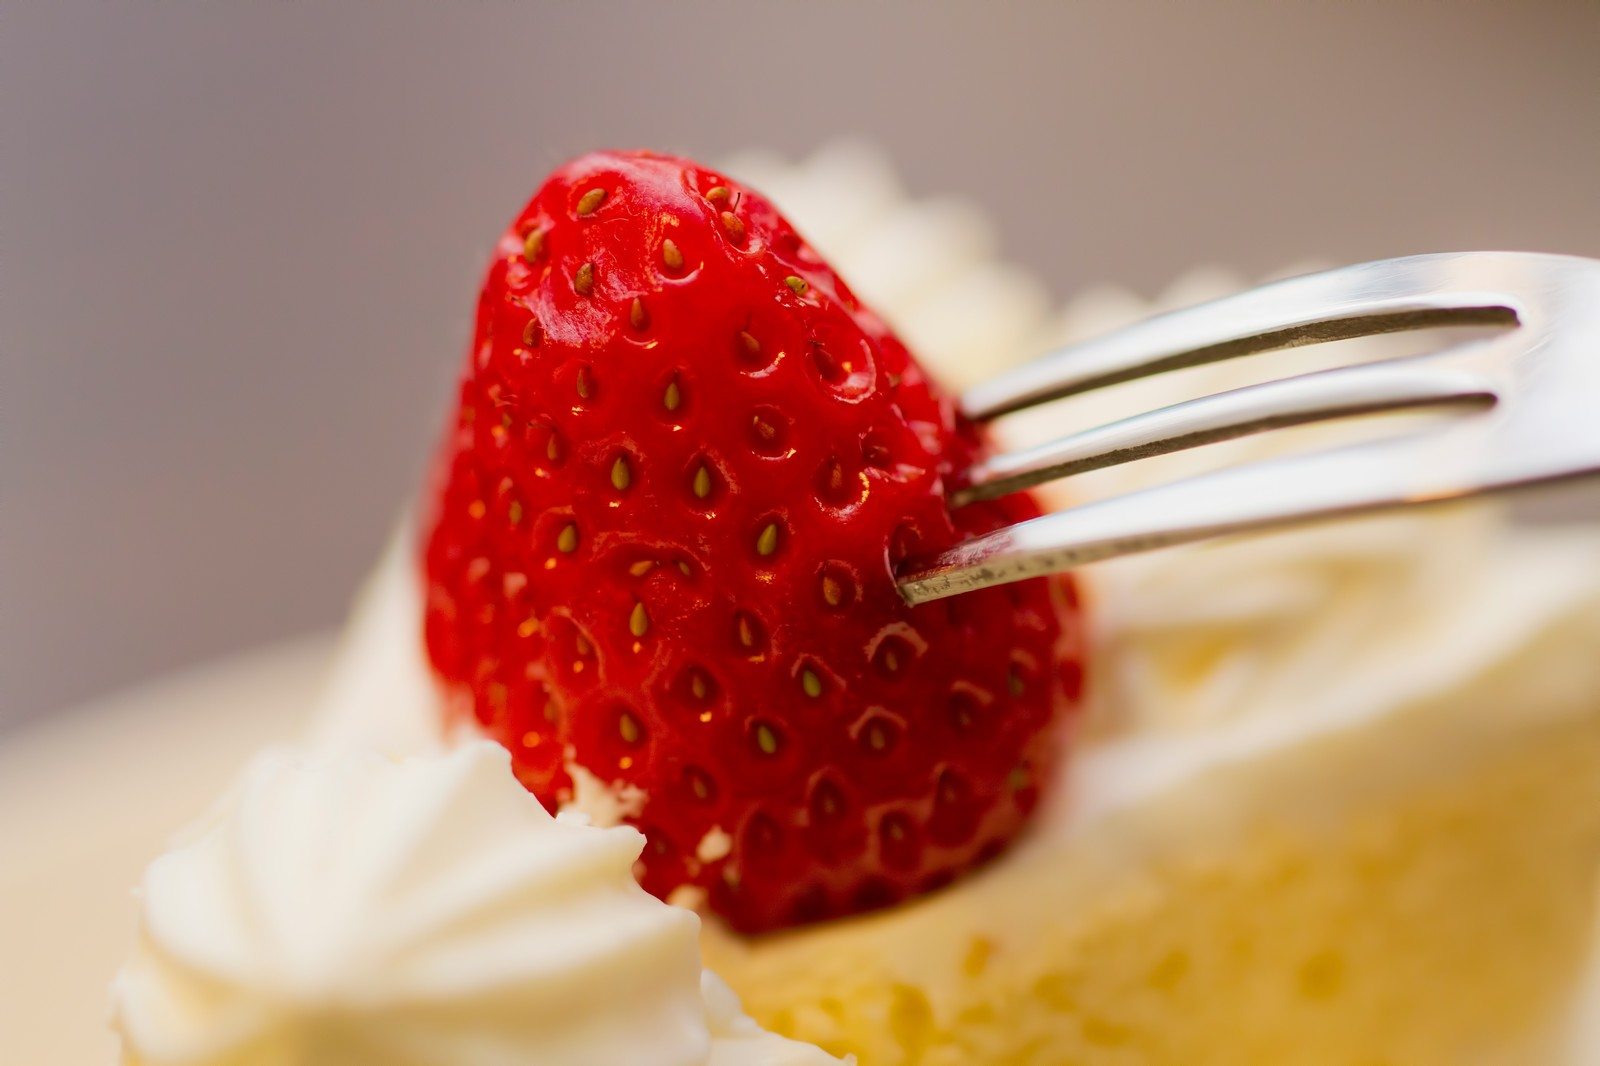

('strawberry', 0.99988973)
('cherry', 4.0359453e-05)
('apple', 3.9832306e-05)
('melon', 2.915261e-05)
('orange', 6.5886218e-07)


In [29]:
predict('./data/samples/strawberry2.jpg')

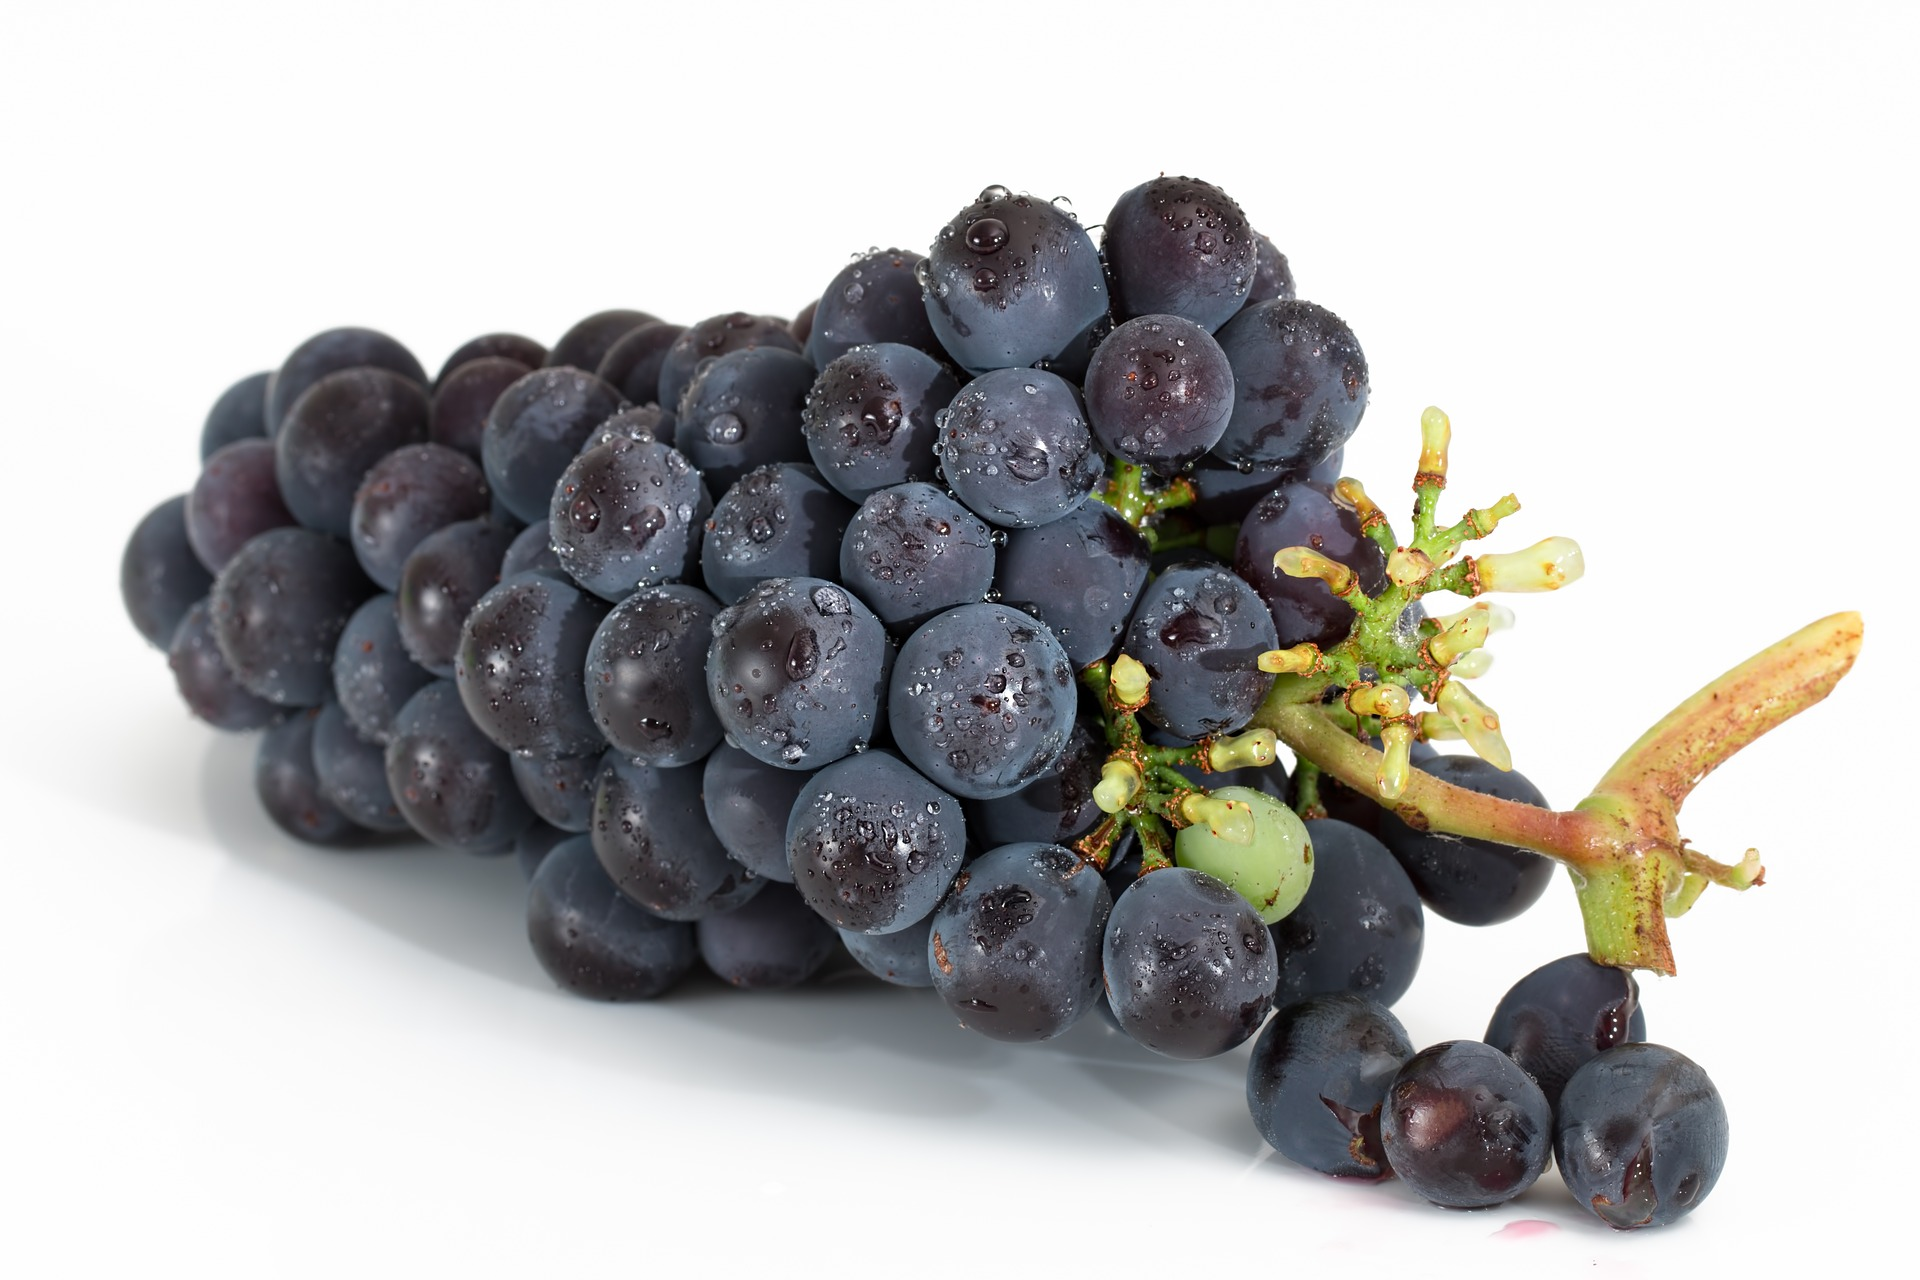

('strawberry', 0.83692223)
('grape', 0.1303151)
('melon', 0.022843137)
('cherry', 0.0087620448)
('apple', 0.00062429981)


In [30]:
predict('./data/samples/grape1.jpg')